1 pixels failed
12 pixels have been generated


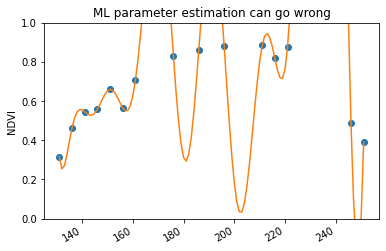

[4.64207785e-02 3.90342955e+01 2.32329996e-20]


In [38]:
import os
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt
while "methods" in os.getcwd():
    os.chdir("..")
sys.path.append(os.getcwd())
import my_utils.cv as cv
import my_utils.data_handle as data_handle
import my_utils.pixel as pixel

importlib.reload(data_handle)  # get changes in my_utils.pixel
importlib.reload(pixel)  # get changes in my_utils.pixel
importlib.reload(cv)  # get changes in my_utils.pixel

np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)

pix = pixels[11]
pix.plot_ndvi("o")
obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
# [psill, range, nugget]
pix.plot_step_interpolate("OK")
plt.title("ML parameter estimation can go wrong")
plt.show()
print(ok.variogram_model_parameters)
# too small nugget


Now estimate reasonable parameters, which we will use later

In [39]:
pixels2 = data_handle.get_pixels(0.01)
param_list = []
for pix in pixels2:
    obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
    # # [psill, range, nugget]
    param_list.append(ok.variogram_model_parameters)
A = np.array(param_list)
parameter = np.median(A, axis=0)
print(f"\nMedian parameter:\n {parameter}")

13 pixels failed
149 pixels have been generated

Median parameter:
 [6.30550362e-02 5.54175049e+01 2.98934616e-03]



12 pixels have been generated


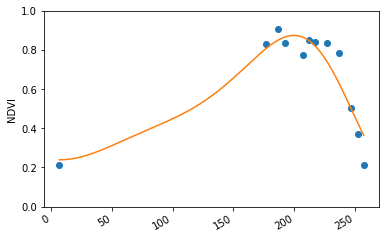

[1.29881772e-01 1.08655468e+02 2.07069624e-02]


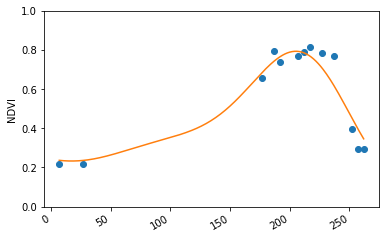

[8.85299849e-02 1.13819890e+02 2.05214408e-02]


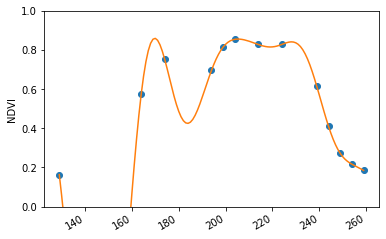

[9.53127071e-02 4.14955189e+01 9.62314918e-15]


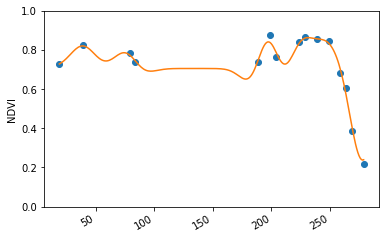

[3.24643998e-02 2.57388659e+01 1.93249769e-03]


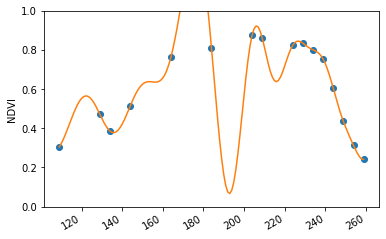

[5.76397767e-02 2.94891421e+01 2.55273728e-15]


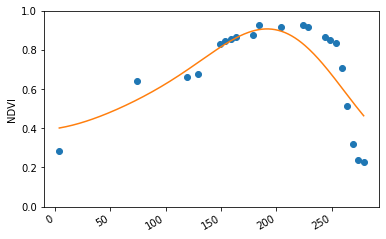

[5.65133303e-02 1.74330895e+02 3.45996615e-02]


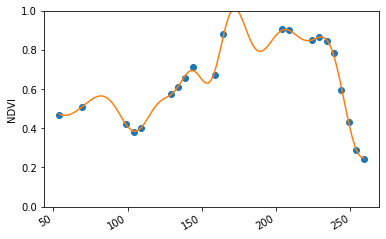

[4.47921273e-02 2.71735761e+01 8.34922713e-04]


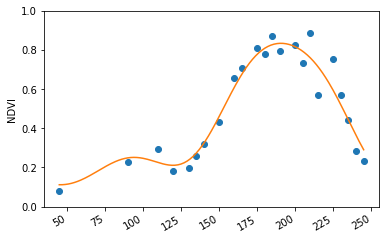

[9.27461673e-02 7.35426302e+01 1.25891247e-02]


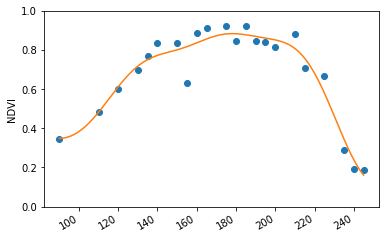

[7.45775200e-02 6.04382920e+01 2.98314714e-03]


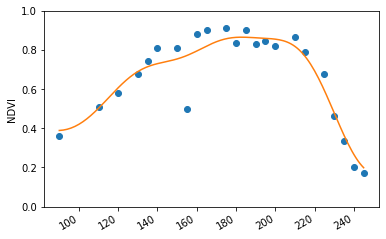

[5.80640849e-02 5.41186013e+01 9.24346191e-03]


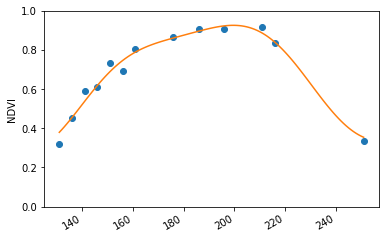

[6.45212307e-02 5.54193376e+01 4.44988390e-03]


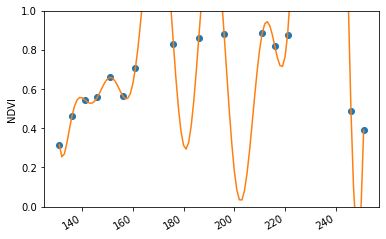

[4.64207785e-02 3.90342955e+01 2.32329996e-20]


In [35]:
np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)
for pix in pixels:
    pix.plot_ndvi("o")
    obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
    # [psill, range, nugget]
    pix.plot_step_interpolate("OK")
    plt.show()
    print(ok.variogram_model_parameters)

In [28]:
def plot_kriging_param(pix, psill, range, nugget):
    pix.plot_ndvi()
    name = "OK_"+str(psill)+"_"+str(range)+"_"+str(nugget)
    pix.get_ordinary_kriging(name=name, ok_args={"variogram_model": "gaussian", "variogram_parameters": [
                             psill, range, nugget]})  # [psill, range, nugget]
    pix.plot_step_interpolate(name) 

pix = pixels[6]

Interpolation with kriging

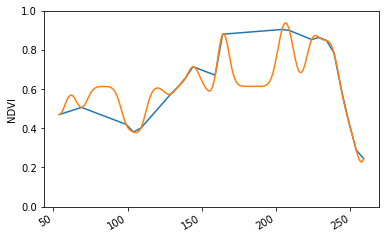

In [29]:
plot_kriging_param(pix, 10,10,0)

add nugget (assume noisy observations)

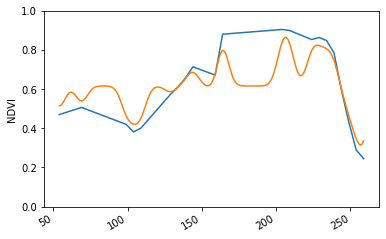

In [30]:
plot_kriging_param(pix, 10,10,3)

==> observe regression the the mean

increase range (more points influence estimation - more smooth - less "regression to the mean")

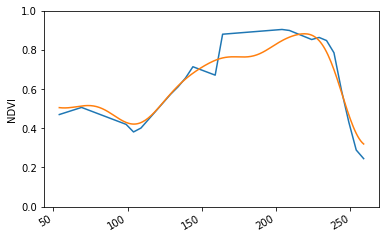

In [31]:
plot_kriging_param(pix,10, 40,3)

4


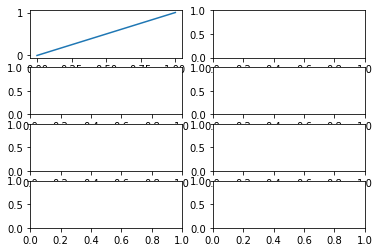

In [32]:
fig, axes = plt.subplots(4, 2)
print(len(axes))
axes[0][0].plot([0, 1], [0, 1])
ax = axes[0][0]